<a href="https://colab.research.google.com/github/getrajeshms/AQI-Project/blob/master/Gemini_Vision_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import userdata
GEMINI_API=userdata.get('Google_Gemini_API')

In [5]:
import google.generativeai as genai

In [6]:
genai.configure(api_key=GEMINI_API)

In [7]:
for models in genai.list_models():
  print(models)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [8]:
for models in genai.list_models():
  if "generateContent" in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [9]:
model_text=genai.GenerativeModel("gemini-1.0-pro")

In [31]:
response=model_text.generate_content("what is the capital of Japan?")

In [32]:
print(response.text)

Tokyo


In [33]:
response.candidates

[content {
  parts {
    text: "Tokyo"
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [34]:
response.parts[0]

text: "Tokyo"

In [35]:
model_image=genai.GenerativeModel("gemini-1.0-pro-vision-latest")

In [36]:
!curl -o image.jpg "https://media.istockphoto.com/id/155439315/photo/passenger-airplane-flying-above-clouds-during-sunset.jpg?s=612x612&w=0&k=20&c=LJWadbs3B-jSGJBVy9s0f8gZMHi2NvWFXa3VJ2lFcL0="


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19991  100 19991    0     0   151k      0 --:--:-- --:--:-- --:--:--  150k


In [37]:
import PIL.Image

In [38]:
image=PIL.Image.open("image.jpg")

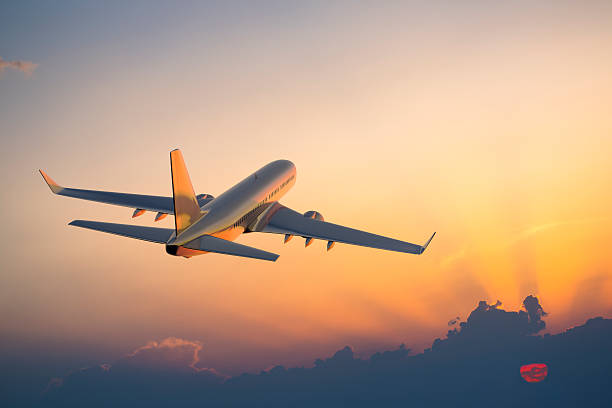

In [39]:
image

In [40]:
model_image.generate_content(image).text

' ✈️ The plane is flying in the sky.'